## PtyPy moonflower example
#### scan model: GradFull
#### engine: Extended Ptychographic Iterative Engine (EPIE)

In [1]:
from ptypy.core import Ptycho
from ptypy import utils as u

In [2]:
# create parameter tree
p = u.Param()

In [3]:
# set verbose level to interactive
p.verbose_level = "interactive"

In [4]:
# set home path and io settings (no files saved)
p.io = u.Param()
p.io.rfile = None
p.io.autosave = u.Param(active=False)
p.io.autoplot = u.Param(active=False)
p.io.interaction = u.Param(active=False)

In [6]:
# max 200 frames (128x128px) of diffraction data
p.scans = u.Param()
p.scans.MF = u.Param()
p.scans.MF.name = 'GradFull'
p.scans.MF.data= u.Param()
p.scans.MF.data.name = 'MoonFlowerScan'
p.scans.MF.data.shape = 128
p.scans.MF.data.num_frames = 200
p.scans.MF.data.save = None
p.scans.MF.data.density = 0.2
p.scans.MF.data.photons = 1e8
p.scans.MF.data.psf = 0.

In [19]:
# EPIE reconstrucion engine
p.engines = u.Param()
p.engines.engine00 = u.Param()
p.engines.engine00.name = 'EPIE'
p.engines.engine00.numiter = 200
p.engines.engine00.numiter_contiguous = 10
p.engines.engine00.object_norm_is_global = True
p.engines.engine00.alpha = 1
p.engines.engine00.beta = 1
p.engines.engine00.probe_update_start = 2

In [17]:
# prepare and run
P = Ptycho(p,level=5)

GradFull: loading data for scan MF (161 diffraction frames, 161 PODs, 1 probe(s) and 1 object(s))
GradFull: loading data for scan MF (reformatting probe/obj/exit)
GradFull: loading data for scan MF (initializing probe/obj/exit)
EPIE: initializing engine
EPIE: preparing engine
EPIE: Iteration # 200/200 :: Fourier 1.26e+01, Photons 7.42e+01, Exit 3.96e+03
==== This reconstruction relied on the following work ==========================
The Ptypy framework:
    Enders B. and Thibault P., "A computational framework for ptychographic reconstructions" Proc. Royal Soc. A 472 (2016) 20160640, doi: 10.1098/rspa.2016.0640.
The ePIE reconstruction algorithm:
    Maiden A. and Rodenburg J., "An improved ptychographical phase retrieval algorithm for diffractive imaging" Ultramicroscopy 10 (2009) 1256, doi: 10.1016/j.ultramic.2009.05.012.


## Plotting the results

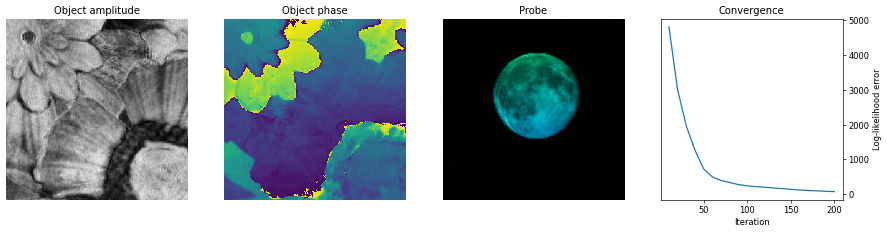

In [18]:
import numpy as np
import matplotlib.pyplot as plt
obj  = P.obj.S['SMFG00'].data[0]
prb  = P.probe.S['SMFG00'].data[:]
likelihood_error = [P.runtime["iter_info"][i]['error'][1] for i in range(len(P.runtime["iter_info"]))]
iterations = [P.runtime["iter_info"][i]['iterations'] for i in range(len(P.runtime["iter_info"]))]
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(18,4), dpi=60)
axes[0].set_title("Object amplitude")
axes[0].axis('off')
axes[0].imshow(np.abs(obj)[100:-100,100:-100], cmap='gray', vmin=None, vmax=None, interpolation='none')
axes[1].set_title("Object phase")
axes[1].axis('off')
axes[1].imshow(np.angle(obj)[100:-100,100:-100], vmin=-np.pi, vmax=np.pi, cmap='viridis', interpolation='none')
axes[2].set_title("Probe")
axes[2].axis('off')
axes[2] = u.PtyAxis(axes[2], channel='c')
axes[2].set_data(prb[0])
axes[3].set_title("Convergence")
axes[3].plot(iterations, likelihood_error)
axes[3].set_xlabel("Iteration")
axes[3].set_ylabel("Log-likelihood error")
axes[3].yaxis.set_label_position('right')
axes[3].tick_params(left=0, right=1, labelleft=0, labelright=1)
plt.show()